# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Rancy Chepchirchir</h2>

# Data

In [165]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [166]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [167]:
# Describe our data for each feature and use .info() for get information about our dataset
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [168]:
# Analys missing values
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


# Exploratory Data Analysis

In [170]:
#distribution of the target variable
print('No Churns', round(data['Churn'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Churns', round(data['Churn'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Churns 85.51 % of the dataset
Churns 14.49 % of the dataset


Proportion of customers that stopped using company product:0.14491449144914492


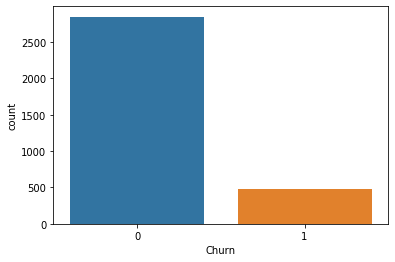

In [171]:
# Our label Distribution (countplot)
sns.countplot('Churn', data=data)
print('Proportion of customers that stopped using company product:{}'.format(data['Churn'].sum()/len(data)))

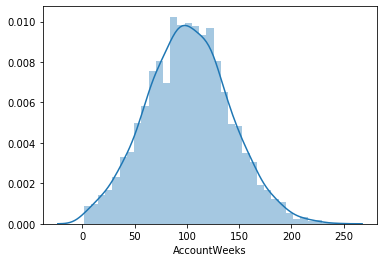

In [172]:
# Example EDA
sns.distplot(data['AccountWeeks'])

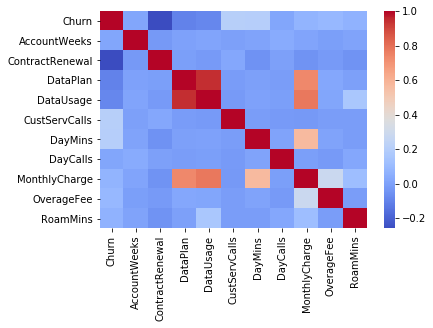

In [173]:
# Correlation matrix
g = sns.heatmap(data.corr(),annot=False, fmt = ".2f", cmap = "coolwarm")

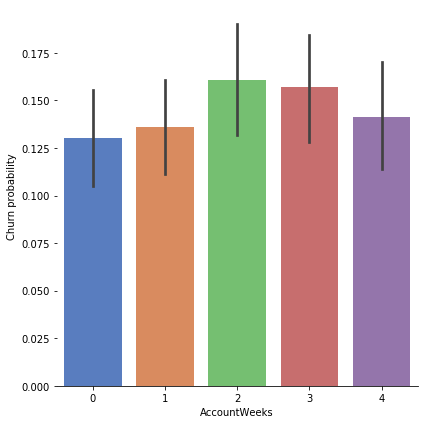

In [174]:
# Explore AccountWeeks feature vs Churn
data.AccountWeeks = pd.qcut(data.AccountWeeks.values, 5).codes
g  = sns.catplot(x="AccountWeeks",y="Churn",data=data,kind="bar", height = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Churn probability")

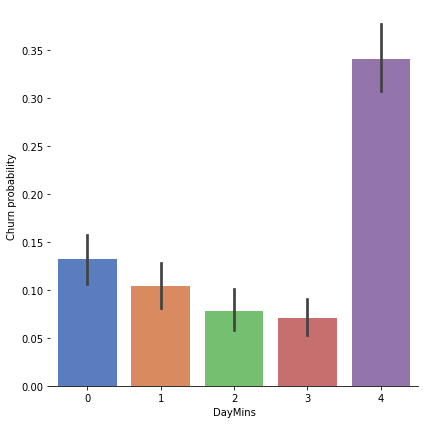

In [175]:
# Explore DayMins feature vs Churn
data.DayMins = pd.qcut(data.DayMins.values, 5).codes
g  = sns.catplot(x="DayMins",y="Churn",data=data,kind="bar", height = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Churn probability")

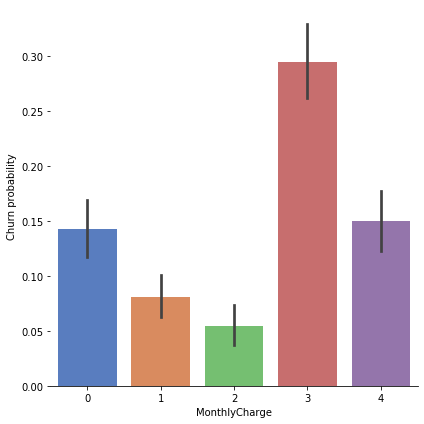

In [176]:
# Explore MonthlyCharge feature vs Churn
data.MonthlyCharge = pd.qcut(data.MonthlyCharge.values, 5).codes
g  = sns.catplot(x="MonthlyCharge",y="Churn",data=data,kind="bar", height = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Churn probability")

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [177]:
#duplicate values
data.duplicated().sum()

0

In [178]:
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,3,1,1,2.7,1,4,110,4,9.87,10.0
1,0,2,1,1,3.7,1,1,123,4,9.78,13.7
2,0,4,1,0,0.0,0,4,114,2,6.06,12.2
3,0,1,0,0,0.0,2,4,71,2,3.10,6.6
4,0,1,0,0,0.0,3,2,113,0,7.42,10.1


In [179]:
#scaling features

#feature scaling
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_AccountWeeks'] = std_scaler.fit_transform(data['AccountWeeks'].values.reshape(-1,1))
data['scaled_DayMins'] = std_scaler.fit_transform(data['DayMins'].values.reshape(-1,1))
data['scaled_DayCalls'] = std_scaler.fit_transform(data['DayCalls'].values.reshape(-1,1))
data['scaled_MonthlyCharge'] = std_scaler.fit_transform(data['MonthlyCharge'].values.reshape(-1,1))

data.drop(['AccountWeeks','DayMins', 'DayCalls', 'MonthlyCharge'], axis=1, inplace=True)

In [180]:
data.head()

,Churn,ContractRenewal,DataPlan,DataUsage,CustServCalls,OverageFee,RoamMins,scaled_AccountWeeks,scaled_DayMins,scaled_DayCalls,scaled_MonthlyCharge
0,0,1,1,2.7,1,9.87,10.0,0.718604,1.414320,0.476643,1.422022
1,0,1,1,3.7,1,9.78,13.7,0.012291,-0.706842,1.124503,1.422022
2,0,1,0,0.0,0,6.06,12.2,1.424917,1.414320,0.675985,0.010377
3,0,0,0,0.0,2,3.10,6.6,-0.694022,1.414320,-1.466936,0.010377
4,0,0,0,0.0,3,7.42,10.1,-0.694022,0.000212,0.626149,-1.401268


In [181]:
# Lets check for outliers in the dataset
def detect_outliers(df,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

# These are the numerical features present in the dataset
Outliers_to_drop = detect_outliers(data,2,["OverageFee", "RoamMins"])

In [182]:
data.describe()

,Churn,ContractRenewal,DataPlan,DataUsage,CustServCalls,OverageFee,RoamMins,scaled_AccountWeeks,scaled_DayMins,scaled_DayCalls,scaled_MonthlyCharge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03
mean,0.144914,0.903090,0.276628,0.816475,1.562856,10.051488,10.237294,2.474268e-16,-1.379701e-16,-2.150828e-16,8.114321e-17
std,0.352067,0.295879,0.447398,1.272668,1.315491,2.535712,2.791840,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.400335e+00,-1.413895e+00,-5.005247e+00,-1.401268e+00
25%,0.000000,1.000000,0.000000,0.000000,1.000000,8.330000,8.500000,-6.940220e-01,-7.068416e-01,-6.695701e-01,-6.954459e-01
50%,0.000000,1.000000,0.000000,0.000000,1.000000,10.070000,10.300000,1.229108e-02,2.121373e-04,2.812491e-02,1.037663e-02
75%,0.000000,1.000000,1.000000,1.780000,2.000000,11.770000,12.100000,7.186041e-01,7.072659e-01,6.759846e-01,7.161992e-01
max,1.000000,1.000000,1.000000,5.400000,9.000000,18.190000,20.000000,1.424917e+00,1.414320e+00,3.217588e+00,1.422022e+00


In [183]:
#differentiate features from target(churn)

X = data.drop('Churn', axis=1)
y = data['Churn']

In [184]:
#split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2333, 10) (2333,)
Test set: (1000, 10) (1000,)


In [185]:
#new features; 

X_train.columns, X_test.columns

(Index(['ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls',
        'OverageFee', 'RoamMins', 'scaled_AccountWeeks', 'scaled_DayMins',
        'scaled_DayCalls', 'scaled_MonthlyCharge'],
       dtype='object'),
 Index(['ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls',
        'OverageFee', 'RoamMins', 'scaled_AccountWeeks', 'scaled_DayMins',
        'scaled_DayCalls', 'scaled_MonthlyCharge'],
       dtype='object'))

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [186]:
!pip install imblearn
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Churns', round(data['Churn'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Churns', round(data['Churn'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why we're using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Churns 85.51 % of the dataset
Churns 14.49 % of the dataset
Train: [ 663  664  665 ... 3330 3331 3332] Test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218

In [187]:
## Separate train features and label 
data["Churn"] = data["Churn"].astype(int)
y_train = data["Churn"]
X_train = data.drop(labels = ["Churn"],axis = 1)

In [188]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples
df = data.sample(frac=1, axis=1)

# amount of churn classes 492 rows.
churn_df = data.loc[data['Churn'] == 1]
non_churn_df = data.loc[data['Churn'] == 0][:600]
normal_distributed_df = pd.concat([churn_df, non_churn_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,Churn,ContractRenewal,DataPlan,DataUsage,CustServCalls,OverageFee,RoamMins,scaled_AccountWeeks,scaled_DayMins,scaled_DayCalls,scaled_MonthlyCharge
415,1,1,0,0.00,2,14.15,8.7,0.718604,1.414320,-2.662985,0.716199
2968,1,1,0,0.00,1,13.54,13.9,1.424917,1.414320,1.772363,0.716199
125,0,1,0,0.40,1,11.47,12.0,-0.694022,0.707266,-2.413808,0.716199
88,0,1,1,2.94,2,6.17,10.9,-0.694022,-0.706842,0.177631,0.716199
378,1,0,0,0.00,1,14.31,11.5,0.012291,-0.706842,-0.819076,0.010377


Distribution of the Classes in the subsample dataset
0    0.554017
1    0.445983
Name: Churn, dtype: float64


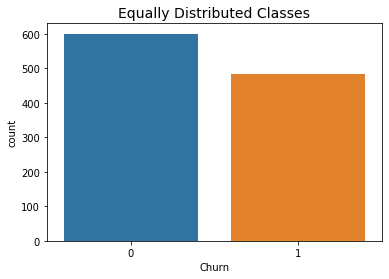

In [189]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Churn'].value_counts()/len(new_df))

sns.countplot('Churn', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [190]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Churn', axis = 1)
y = new_df['Churn']

In [191]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split
# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [192]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [193]:
# Let's implement simple classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [194]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 70.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 72.0 % accuracy score
Classifiers:  SVC Has a training score of 72.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 73.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 82.0 % accuracy score


In [195]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
# Logistic Regression 
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# log_reg best estimator
log_reg = grid_log_reg.best_estimator_

In [196]:
# kNN classifier
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

In [197]:
# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
# SVC best estimator
svc = grid_svc.best_estimator_

In [198]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [199]:
# RandomForest Classifier
rf_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_split": list(range(5,7,1))}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_train, y_train)

# tree best estimator
rf_clf = grid_rf.best_estimator_

In [200]:
# Overfitting Case
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

rf_score = cross_val_score(rf_clf, X_train, y_train, cv=5)
print('RandomForest Classifier Cross Validation Score', round(rf_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  70.58%
Knears Neighbors Cross Validation Score 71.37%
Support Vector Classifier Cross Validation Score 73.88%
DecisionTree Classifier Cross Validation Score 81.93%
RandomForest Classifier Cross Validation Score 81.8%


From the closely-related training and cross validation scores above, there is no evidence of oversampling nor undersampling in the dataset, hence, we should expect reliable results.

In [202]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method="decision_function")
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)
rf_pred = cross_val_predict(rf_clf, X_train, y_train, cv=5)

In [203]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('Random Forest Classifier: ', roc_auc_score(y_train, rf_pred))

Logistic Regression:  0.7779286158719385
KNears Neighbors:  0.7024365065897393
Support Vector Classifier:  0.8060057129928164
Decision Tree Classifier:  0.8209245432433963
Random Forest Classifier:  0.8089399852932858


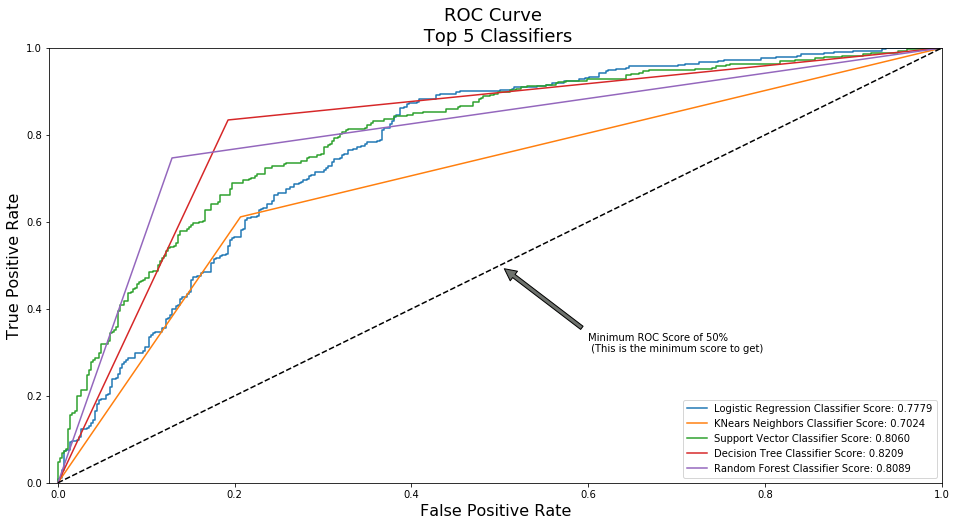

In [204]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_train, rf_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 5 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, rf_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, rf_fpr, rf_tpr)
plt.show()

In [205]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [206]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.65
Precision Score: 0.69
F1 Score: 0.67
Accuracy Score: 0.72
---------------------------------------------------------------------------------------------------------------------------------------


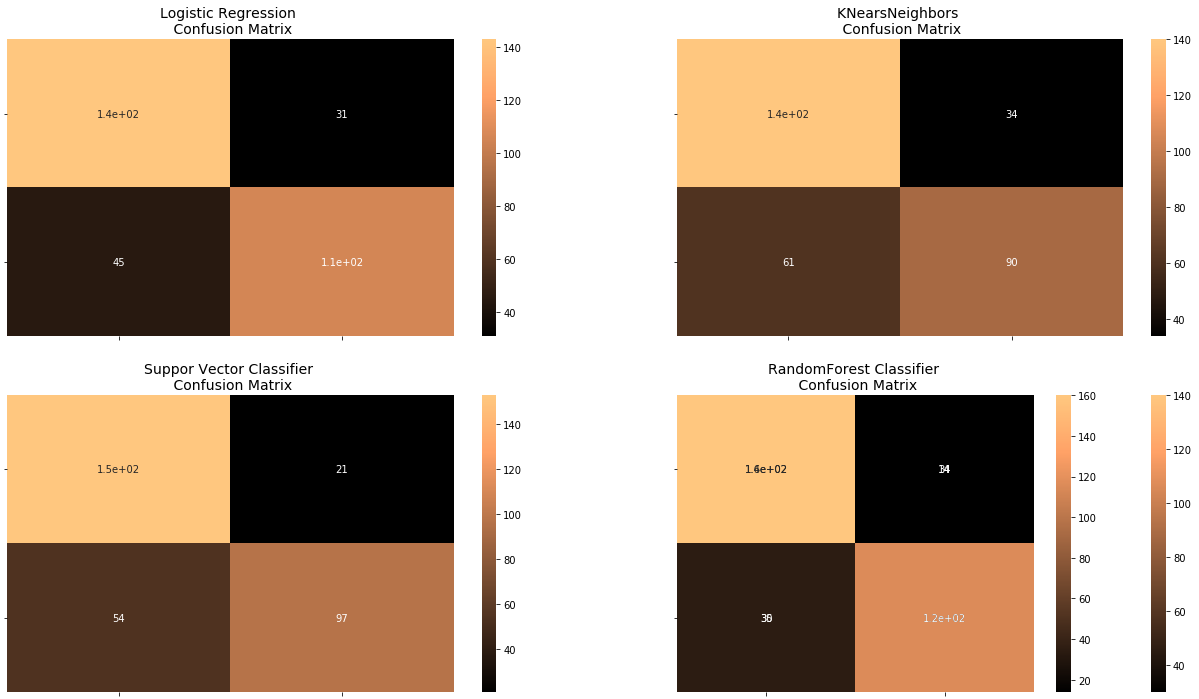

In [225]:
from sklearn.metrics import confusion_matrix
# Logistic Regression fitted using SMOTE technique
log_reg_sm = LogisticRegression()
log_reg_sm.fit(X_train, y_train)
y_pred_log_reg = log_reg_sm.predict(X_test)
# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)
rf_cf = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(2, 2,figsize=(22,12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(rf_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("RandomForest Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [230]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

print('Random Forest Classifier:')
print(classification_report(y_test, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       174
           1       0.77      0.70      0.74       151

    accuracy                           0.77       325
   macro avg       0.77      0.76      0.76       325
weighted avg       0.77      0.77      0.76       325

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       174
           1       0.73      0.60      0.65       151

    accuracy                           0.71       325
   macro avg       0.71      0.70      0.70       325
weighted avg       0.71      0.71      0.70       325

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       174
           1       0.82      0.64      0.72       151

    accuracy                           0.77       325
   macro avg       0.78      0.76      0.76       325
weighted

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

From the ROC-AUC curve, the Decision Tree Classifier performed the best (0.8209245432433963) followed by Random Forest Classifier (0.8089399852932858). However, consistent performance was seen for the SVC and Logistic classifiers  with scores of 0.8060057129928164 and 0.7779286158719385 respectively. K-nearest Neighbours did not perform as well (0.7024365065897393). From the confusion matrices, random forest classifier had the highest numbers of rightly-classified customers followed by the Logistic regression. From the classification reports, Random Forest and Decision Tree classifiers attained high scores for both precision and recall. All these perfomances could further be improved by oversampling e.g. by use of SMOTE.